In [21]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set Seaborn style
sns.set_style("white")

# Set working directory
os.chdir('/workspaces/Readmission-Prediction')
print("You set a new current directory:", os.getcwd())

# Load cleaned dataset
df = pd.read_csv("inputs/readmission_dataset/cleaned_hospital_readmissions.csv")
print(" Dataset Loaded Successfully")

You set a new current directory: /workspaces/Readmission-Prediction
 Dataset Loaded Successfully


# Exploratory Data Analysis

## Objectives

* Visualize distributions & relationships (correlation heatmaps, histograms and boxplots).
* Check data balance (readmission rates and feature distributions).
* Test the hypothesis (statistical significance of key variables).

## Inputs

* Cleaned_hospital_readmissions.csv (Preprocessed dataset).

## Outputs

* Data distribution summaries.
* Visualizations
* Hypothesis testing results

# Checking Data Quality & Distribution

In [22]:
import pandas as pd
import numpy as np

# Load cleaned dataset
df = pd.read_csv("inputs/readmission_dataset/cleaned_hospital_readmissions.csv")

# Display dataset shape & info
print(f"Dataset Shape: {df.shape}")  
df.info()

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Quick summary statistics
print("\nSummary Statistics:")
print(df.describe())

# Save cleaned dataset
df.to_csv("inputs/readmission_dataset/cleaned_hospital_readmissions.csv", index=False)
print("\n Data successfully saved for EDA.")

Dataset Shape: (25000, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   age                25000 non-null  int64 
 1   time_in_hospital   25000 non-null  int64 
 2   n_lab_procedures   25000 non-null  int64 
 3   n_procedures       25000 non-null  int64 
 4   n_medications      25000 non-null  int64 
 5   n_outpatient       25000 non-null  int64 
 6   n_inpatient        25000 non-null  int64 
 7   n_emergency        25000 non-null  int64 
 8   medical_specialty  25000 non-null  object
 9   diag_1             25000 non-null  object
 10  diag_2             25000 non-null  object
 11  diag_3             25000 non-null  object
 12  glucose_test       25000 non-null  object
 13  A1Ctest            25000 non-null  object
 14  change             25000 non-null  object
 15  diabetes_med       25000 non-null  object
 16  readmitted   

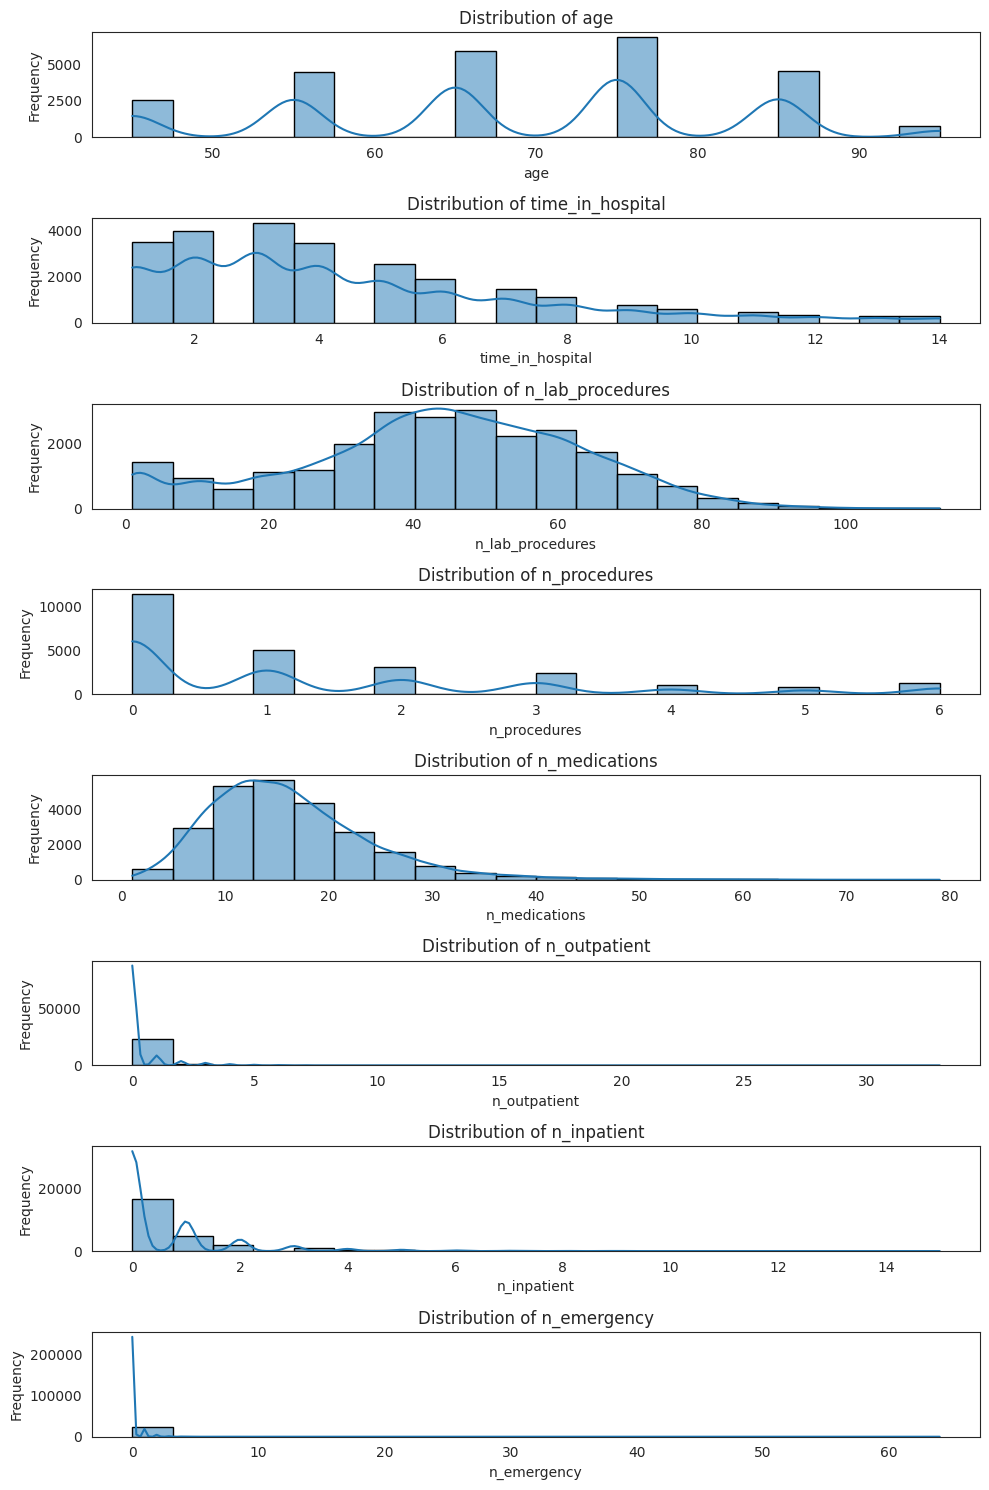

In [23]:
import pandas as pd  
import matplotlib.pyplot as plt  
import seaborn as sns  

# Load cleaned dataset
df = pd.read_csv("inputs/readmission_dataset/cleaned_hospital_readmissions.csv")

# Select numerical columns for visualization
num_cols = ["age", "time_in_hospital", "n_lab_procedures", "n_procedures", "n_medications", "n_outpatient", "n_inpatient", "n_emergency"]

# Histogram for distrubition shape
fig, axes = plt.subplots(nrows=len(num_cols), ncols=1, figsize=(10, 15))

for i, col in enumerate(num_cols):
    sns.histplot(df[col], kde=True, bins=20, edgecolor="black", ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

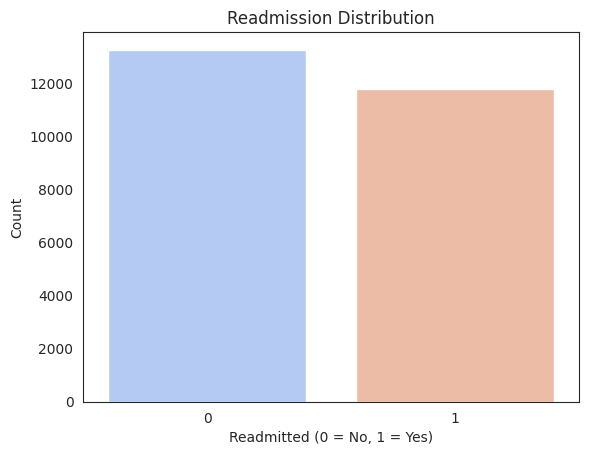

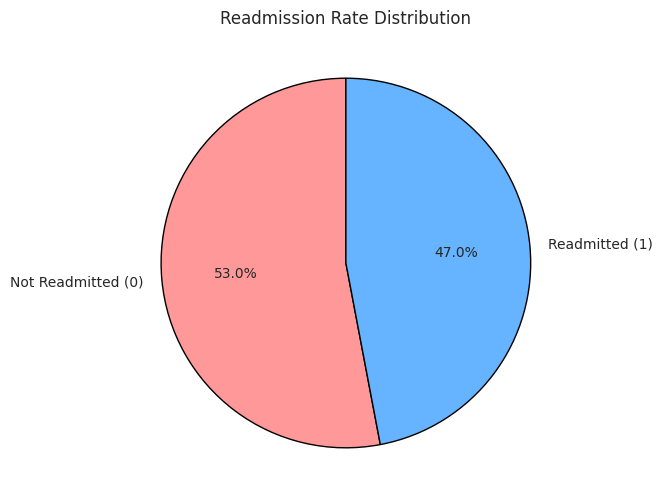


Readmission Rate:
 readmitted
0    52.984
1    47.016
Name: proportion, dtype: float64


In [24]:
# Countplot for readmission distribution
sns.countplot(x="readmitted", hue="readmitted", data=df, palette="coolwarm", legend=False)
plt.title("Readmission Distribution")
plt.xlabel("Readmitted (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.show()

# Pie Chart for Readmission Distribution
readmission_counts = df["readmitted"].value_counts()
labels = ["Not Readmitted (0)", "Readmitted (1)"]
colors = ["#ff9999", "#66b3ff"]  # Adjust colors as needed

plt.figure(figsize=(6,6))
plt.pie(readmission_counts, labels=labels, autopct="%1.1f%%", colors=colors, startangle=90, wedgeprops={"edgecolor": "black"})
plt.title("Readmission Rate Distribution")
plt.show()

# Percentage of readmitted vs. non-readmitted patients
readmission_rate = df["readmitted"].value_counts(normalize=True) * 100
print("\nReadmission Rate:\n", readmission_rate)

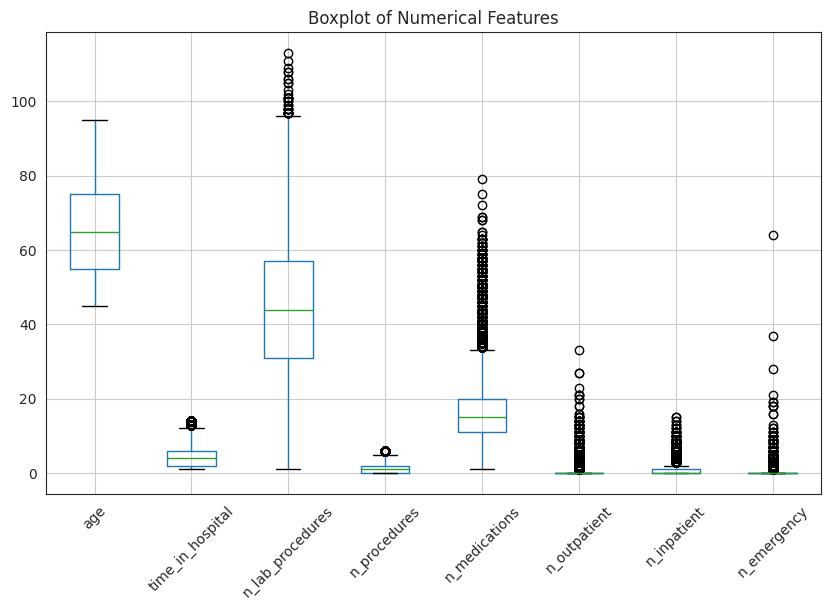

In [25]:
# Boxplot for numerical features
plt.figure(figsize=(10, 6))
df[num_cols].boxplot()
plt.title("Boxplot of Numerical Features")
plt.xticks(rotation=45)
plt.show()

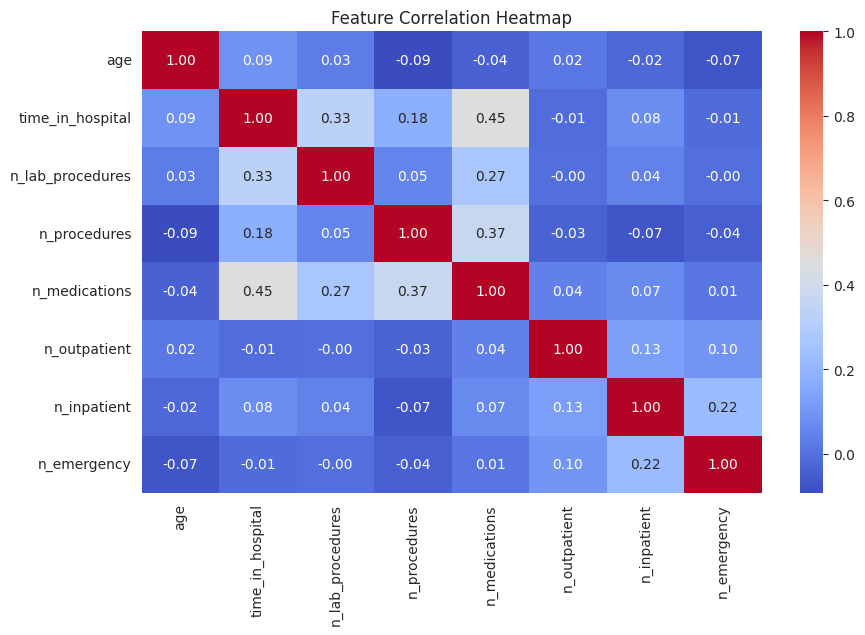

In [26]:
# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df[num_cols].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()

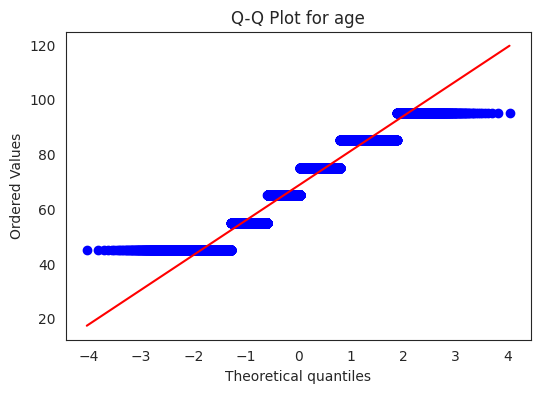

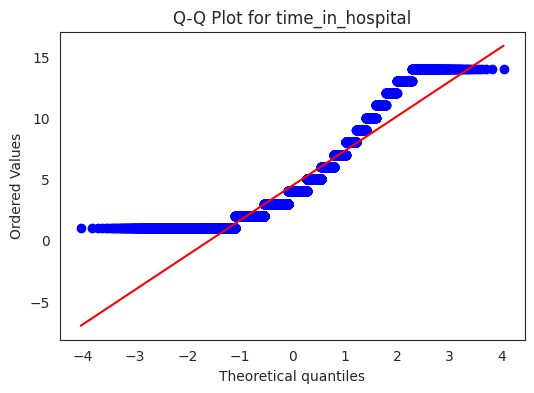

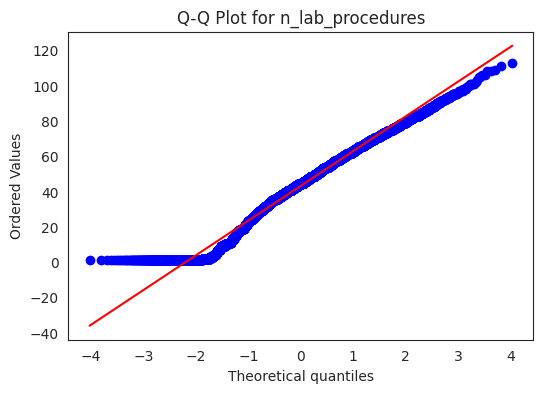

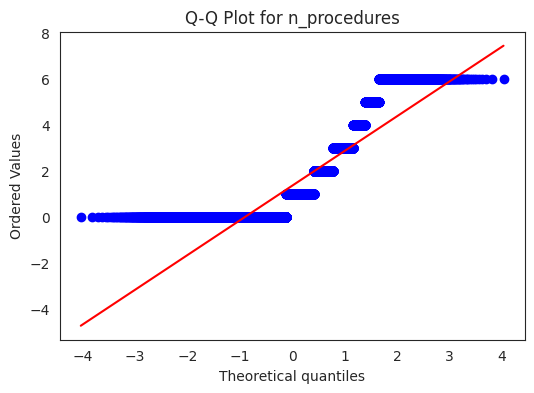

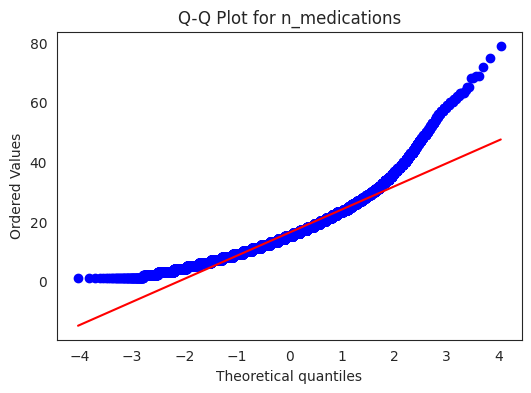

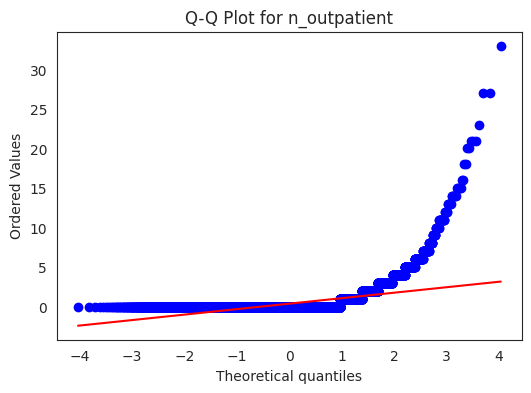

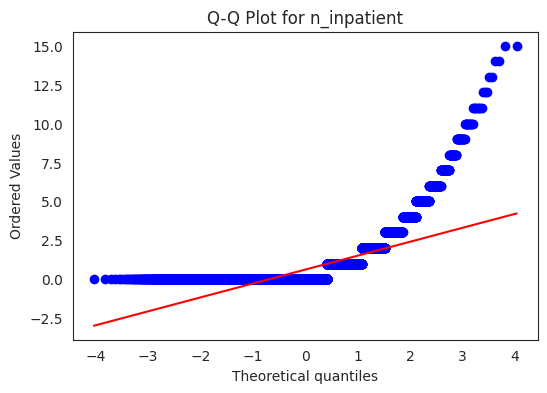

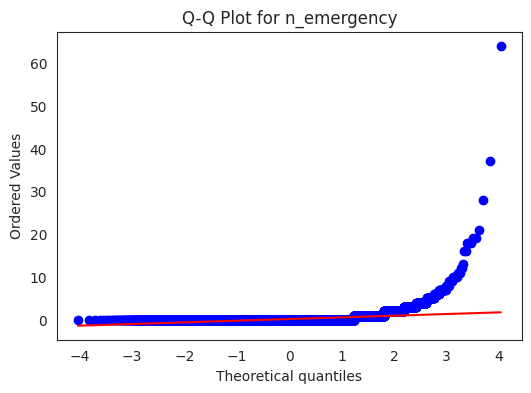

In [27]:
import scipy.stats as stats

for col in num_cols:
    plt.figure(figsize=(6, 4))
    stats.probplot(df[col], dist="norm", plot=plt)
    plt.title(f"Q-Q Plot for {col}")
    plt.show()

In [28]:
df[num_cols].skew()


age                 -0.126178
time_in_hospital     1.108905
n_lab_procedures    -0.238672
n_procedures         1.300572
n_medications        1.316139
n_outpatient         7.302605
n_inpatient          3.254634
n_emergency         24.530152
dtype: float64

data seems to be right skewed

In [29]:
import numpy as np

df["boxcox_time_in_hospital"], lambda_time = stats.boxcox(df["time_in_hospital"] + 1)
df["sqrt_n_procedures"] = np.sqrt(df["n_procedures"])
df["log_n_medications"] = np.log1p(df["n_medications"])
df["boxcox_n_outpatient"], lambda_outpatient = stats.boxcox(df["n_outpatient"] + 1)
df["boxcox_n_inpatient"], lambda_inpatient = stats.boxcox(df["n_inpatient"] + 1)
df["boxcox_n_emergency"], lambda_emergency = stats.boxcox(df["n_emergency"] + 1)

df[[
    "boxcox_time_in_hospital", "sqrt_n_procedures", "log_n_medications", "boxcox_n_outpatient", "boxcox_n_inpatient", "boxcox_n_emergency"
]].skew()


boxcox_time_in_hospital    0.008696
sqrt_n_procedures          0.398244
log_n_medications         -0.488444
boxcox_n_outpatient        1.799456
boxcox_n_inpatient         0.725462
boxcox_n_emergency         2.507482
dtype: float64

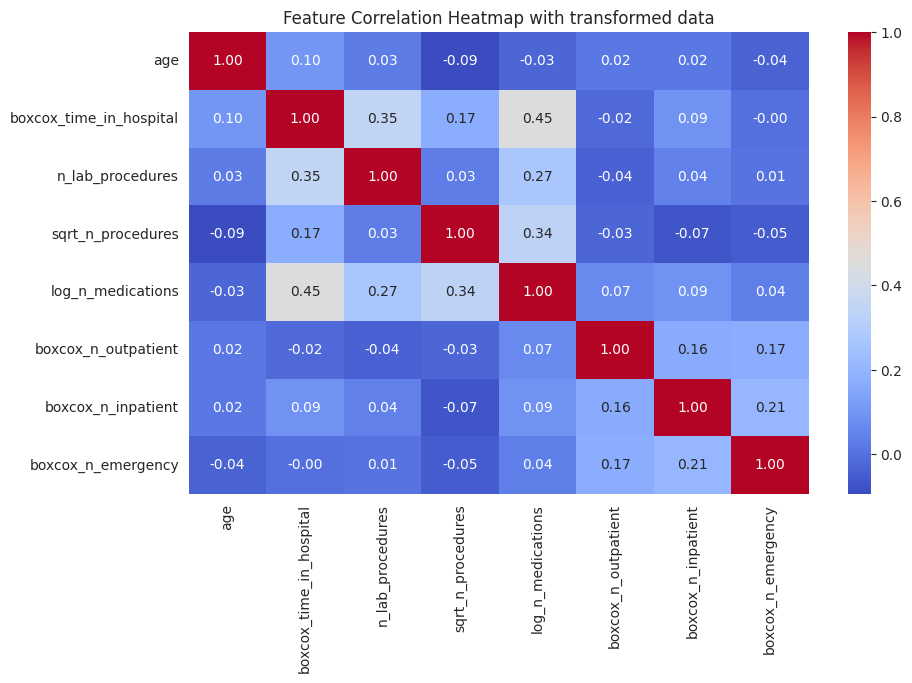

In [30]:
transformed_num_data = ["age", "boxcox_time_in_hospital", "n_lab_procedures", "sqrt_n_procedures", "log_n_medications", "boxcox_n_outpatient", "boxcox_n_inpatient", "boxcox_n_emergency"]

plt.figure(figsize=(10,6))
sns.heatmap(df[transformed_num_data].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap with transformed data")
plt.show()

In [31]:
from sklearn.preprocessing import OneHotEncoder

# Selecting categorical columns for One-Hot Encoding
cat_cols = ["medical_specialty", "diag_1", "diag_2", "diag_3", "glucose_test", "A1Ctest", "change", "diabetes_med"]

# Apply One-Hot Encoding
encoded_data = pd.get_dummies(df, columns=cat_cols, drop_first=True)


In [32]:
from scipy.stats import chi2_contingency
import pandas as pd

for col in cat_cols:
    # Create contingency table
    contingency_table = pd.crosstab(df[col], df["readmitted"])
    
    # Perform Chi-Square test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    
    # Print result
    if p < 0.05:
        print(f"{col}: Chi-Square p-value = {p:.5f} (Significant)")
    else:
        print(f"{col}: Chi-Square p-value = {p:.5f} (Not Significant)")

medical_specialty: Chi-Square p-value = 0.00000 (Significant)
diag_1: Chi-Square p-value = 0.00000 (Significant)
diag_2: Chi-Square p-value = 0.00002 (Significant)
diag_3: Chi-Square p-value = 0.00000 (Significant)
glucose_test: Chi-Square p-value = 0.02072 (Significant)
A1Ctest: Chi-Square p-value = 0.00060 (Significant)
change: Chi-Square p-value = 0.00000 (Significant)
diabetes_med: Chi-Square p-value = 0.00000 (Significant)


In [34]:
df_transformed = df[transformed_num_data]

cat_cols = ["medical_specialty", "diag_1", "diag_2", "diag_3", "glucose_test", "A1Ctest", "change", "diabetes_med"]
df_encoded = pd.get_dummies(df, columns=cat_cols, drop_first=True)  # Encode categorical features

df_target = df[["readmitted"]]

final_df = pd.concat([df_transformed, df_encoded, df_target], axis=1)

print("Final Data Shape:", final_df.shape)
print(final_df.head())

Final Data Shape: (25000, 57)
   age  boxcox_time_in_hospital  n_lab_procedures  sqrt_n_procedures  \
0   75                 2.052323                72           1.000000   
1   75                 1.327644                34           1.414214   
2   55                 1.694598                45           0.000000   
3   75                 1.061558                36           0.000000   
4   65                 0.678272                42           0.000000   

   log_n_medications  boxcox_n_outpatient  boxcox_n_inpatient  \
0           2.944439             0.181237                 0.0   
1           2.639057             0.000000                 0.0   
2           2.944439             0.000000                 0.0   
3           2.564949             0.177665                 0.0   
4           2.079442             0.000000                 0.0   

   boxcox_n_emergency  age  time_in_hospital  ...  diag_3_Musculoskeletal  \
0                 0.0   75                 8  ...                   F